In [88]:
import numpy as np
import pandas
from tabulate import tabulate
from matplotlib import pyplot as plt

p = np.array([0.9,0.8,0.7,0.6,0.55,0.54,0.53,0.51,0.5,0.5])
ac = np.array(["Positive","Positive","Negative","Positive","Positive","Negative","Negative","Negative","Positive","Negative"])
pc = []
threshold = 0


TP = []
FN = []
FP = []
TN = []

tp = 0
fn = 0
fp = 0
tn = 0
metrics = []
index = 0
for t in p:
    threshold = t
    print("Threshold: "+str(threshold))
    metrics = []
    pc = []
    
    tp = 0
    fn = 0
    fp = 0
    tn = 0
    
    for i in range(p.shape[0]):
        if p[i]>=threshold:
            pc.append("Positive")
        else:
            pc.append("Negative")
            
    

    for i in range(p.shape[0]):
        if ac[i]=="Positive" and pc[i]=="Positive":
            tp+=1
            metrics.append("TP")
        elif ac[i]=="Positive" and pc[i]=="Negative":
            fn+=1
            metrics.append("FN")
        elif ac[i]=="Negative" and pc[i]=="Positive":
            fp+=1
            metrics.append("FP")
        elif ac[i]=="Negative" and pc[i]=="Negative":
            tn+=1
            metrics.append("TN")
    TP.append(tp)
    FN.append(fn)
    FP.append(fp)
    TN.append(tn)
    index+=1
    #df = pandas.DataFrame({"Probability": p, "Actual Class": ac, "Predicted Class": pc, "Metrics": metrics})
    #df['Probability'].round(decimals=2)
    #display(df)
    print()

    print("TP: "+str(tp), end = "      ")
    print("FP: "+str(fp), end = "      ")
    print("FN: "+str(fn), end = "      ")
    print("TN: "+str(tn), end = "      ")
    sensitivity = tp/(tp+fn)
    speceficity = tn/(tn+fp)
    fpr = fp/(fp+tn)
    J = sensitivity+speceficity-1
    J = round(J,2)
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    print()
    print("Youden Index: "+str(J))

    print()
    print("TPR: "+str(sensitivity))
    print()
    print("FPR: "+str(fpr))
    print("-------x-------")

        
print()








Threshold: 0.9

TP: 1      FP: 0      FN: 4      TN: 5      
Youden Index: 0.2

TPR: 0.2

FPR: 0.0
-------x-------
Threshold: 0.8

TP: 2      FP: 0      FN: 3      TN: 5      
Youden Index: 0.4

TPR: 0.4

FPR: 0.0
-------x-------
Threshold: 0.7

TP: 2      FP: 1      FN: 3      TN: 4      
Youden Index: 0.2

TPR: 0.4

FPR: 0.2
-------x-------
Threshold: 0.6

TP: 3      FP: 1      FN: 2      TN: 4      
Youden Index: 0.4

TPR: 0.6

FPR: 0.2
-------x-------
Threshold: 0.55

TP: 4      FP: 1      FN: 1      TN: 4      
Youden Index: 0.6

TPR: 0.8

FPR: 0.2
-------x-------
Threshold: 0.54

TP: 4      FP: 2      FN: 1      TN: 3      
Youden Index: 0.4

TPR: 0.8

FPR: 0.4
-------x-------
Threshold: 0.53

TP: 4      FP: 3      FN: 1      TN: 2      
Youden Index: 0.2

TPR: 0.8

FPR: 0.6
-------x-------
Threshold: 0.51

TP: 4      FP: 4      FN: 1      TN: 1      
Youden Index: 0.0

TPR: 0.8

FPR: 0.8
-------x-------
Threshold: 0.5

TP: 5      FP: 5      FN: 0      TN: 0      
Youden Index: 0

TPR:
[0.2, 0.4, 0.4, 0.6, 0.8, 0.8, 0.8, 0.8, 1.0, 1.0]
FPR:
[0.0, 0.0, 0.2, 0.2, 0.2, 0.4, 0.6, 0.8, 1.0, 1.0]


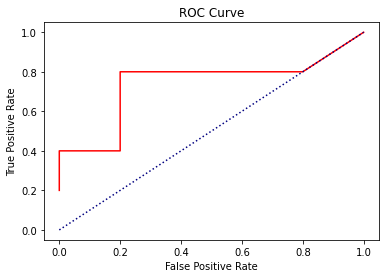

In [87]:
TPR = []
FPR = []

for i in range(10):
    tpr = TP[i]/(TP[i]+FN[i])
    fpr = FP[i]/(FP[i]+TN[i])
    TPR.append(tpr)
    FPR.append(fpr)
print("TPR:")
print(TPR)
print("FPR:")
print(FPR)

#plt.plot(FPR,TPR)
plt.figure()
plt.plot(FPR, TPR, color='red')
plt.plot([0,1],[0, 1],  color='navy', linestyle=':')
#plt.xlim([0, 1])
#plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()